# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 289kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.head(2)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [ ]:
df_data.tail(2)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


The database is recorded from October 1957 to August 2020

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [7]:
df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.isna().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False]])

Most of the NaN values lie in price columns

In [8]:
df_data.duplicated().values.any()

True

In [9]:
df_data.drop_duplicates(inplace=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


Data in "Date" and "Price" are not in the right format

In [10]:
df_data["Price"] = df_data["Price"].str.replace(",", "")
df_data["Price"] = pd.to_numeric(df_data["Price"])

In [11]:
df_data["Date"] = pd.to_datetime(df_data["Date"], utc=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [ ]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
company_count = df_data["Organisation"].value_counts()[:10]

In [ ]:
company_bar = px.bar(company_count,
                     title="Top ten company with highest number of launch",
                     color=company_count.values,
                     color_continuous_scale='bluyl')
company_bar.update_layout(xaxis_title="Company",
                          yaxis_title="Number of launch")
company_bar.show()

RVSN USSR has significantly higher number of launch comparing to any other companies. This indicates amount of interest, funding and space knowledge of Soviet Union.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

Only around 20% of all launched rockets are still active. That is one of the obvious sign of space junk concern.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

Up to 89% of satellite launching mission was a success. However, we need to explore further in the failure to understand what actually happended.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
data_dropna = df_data.dropna()

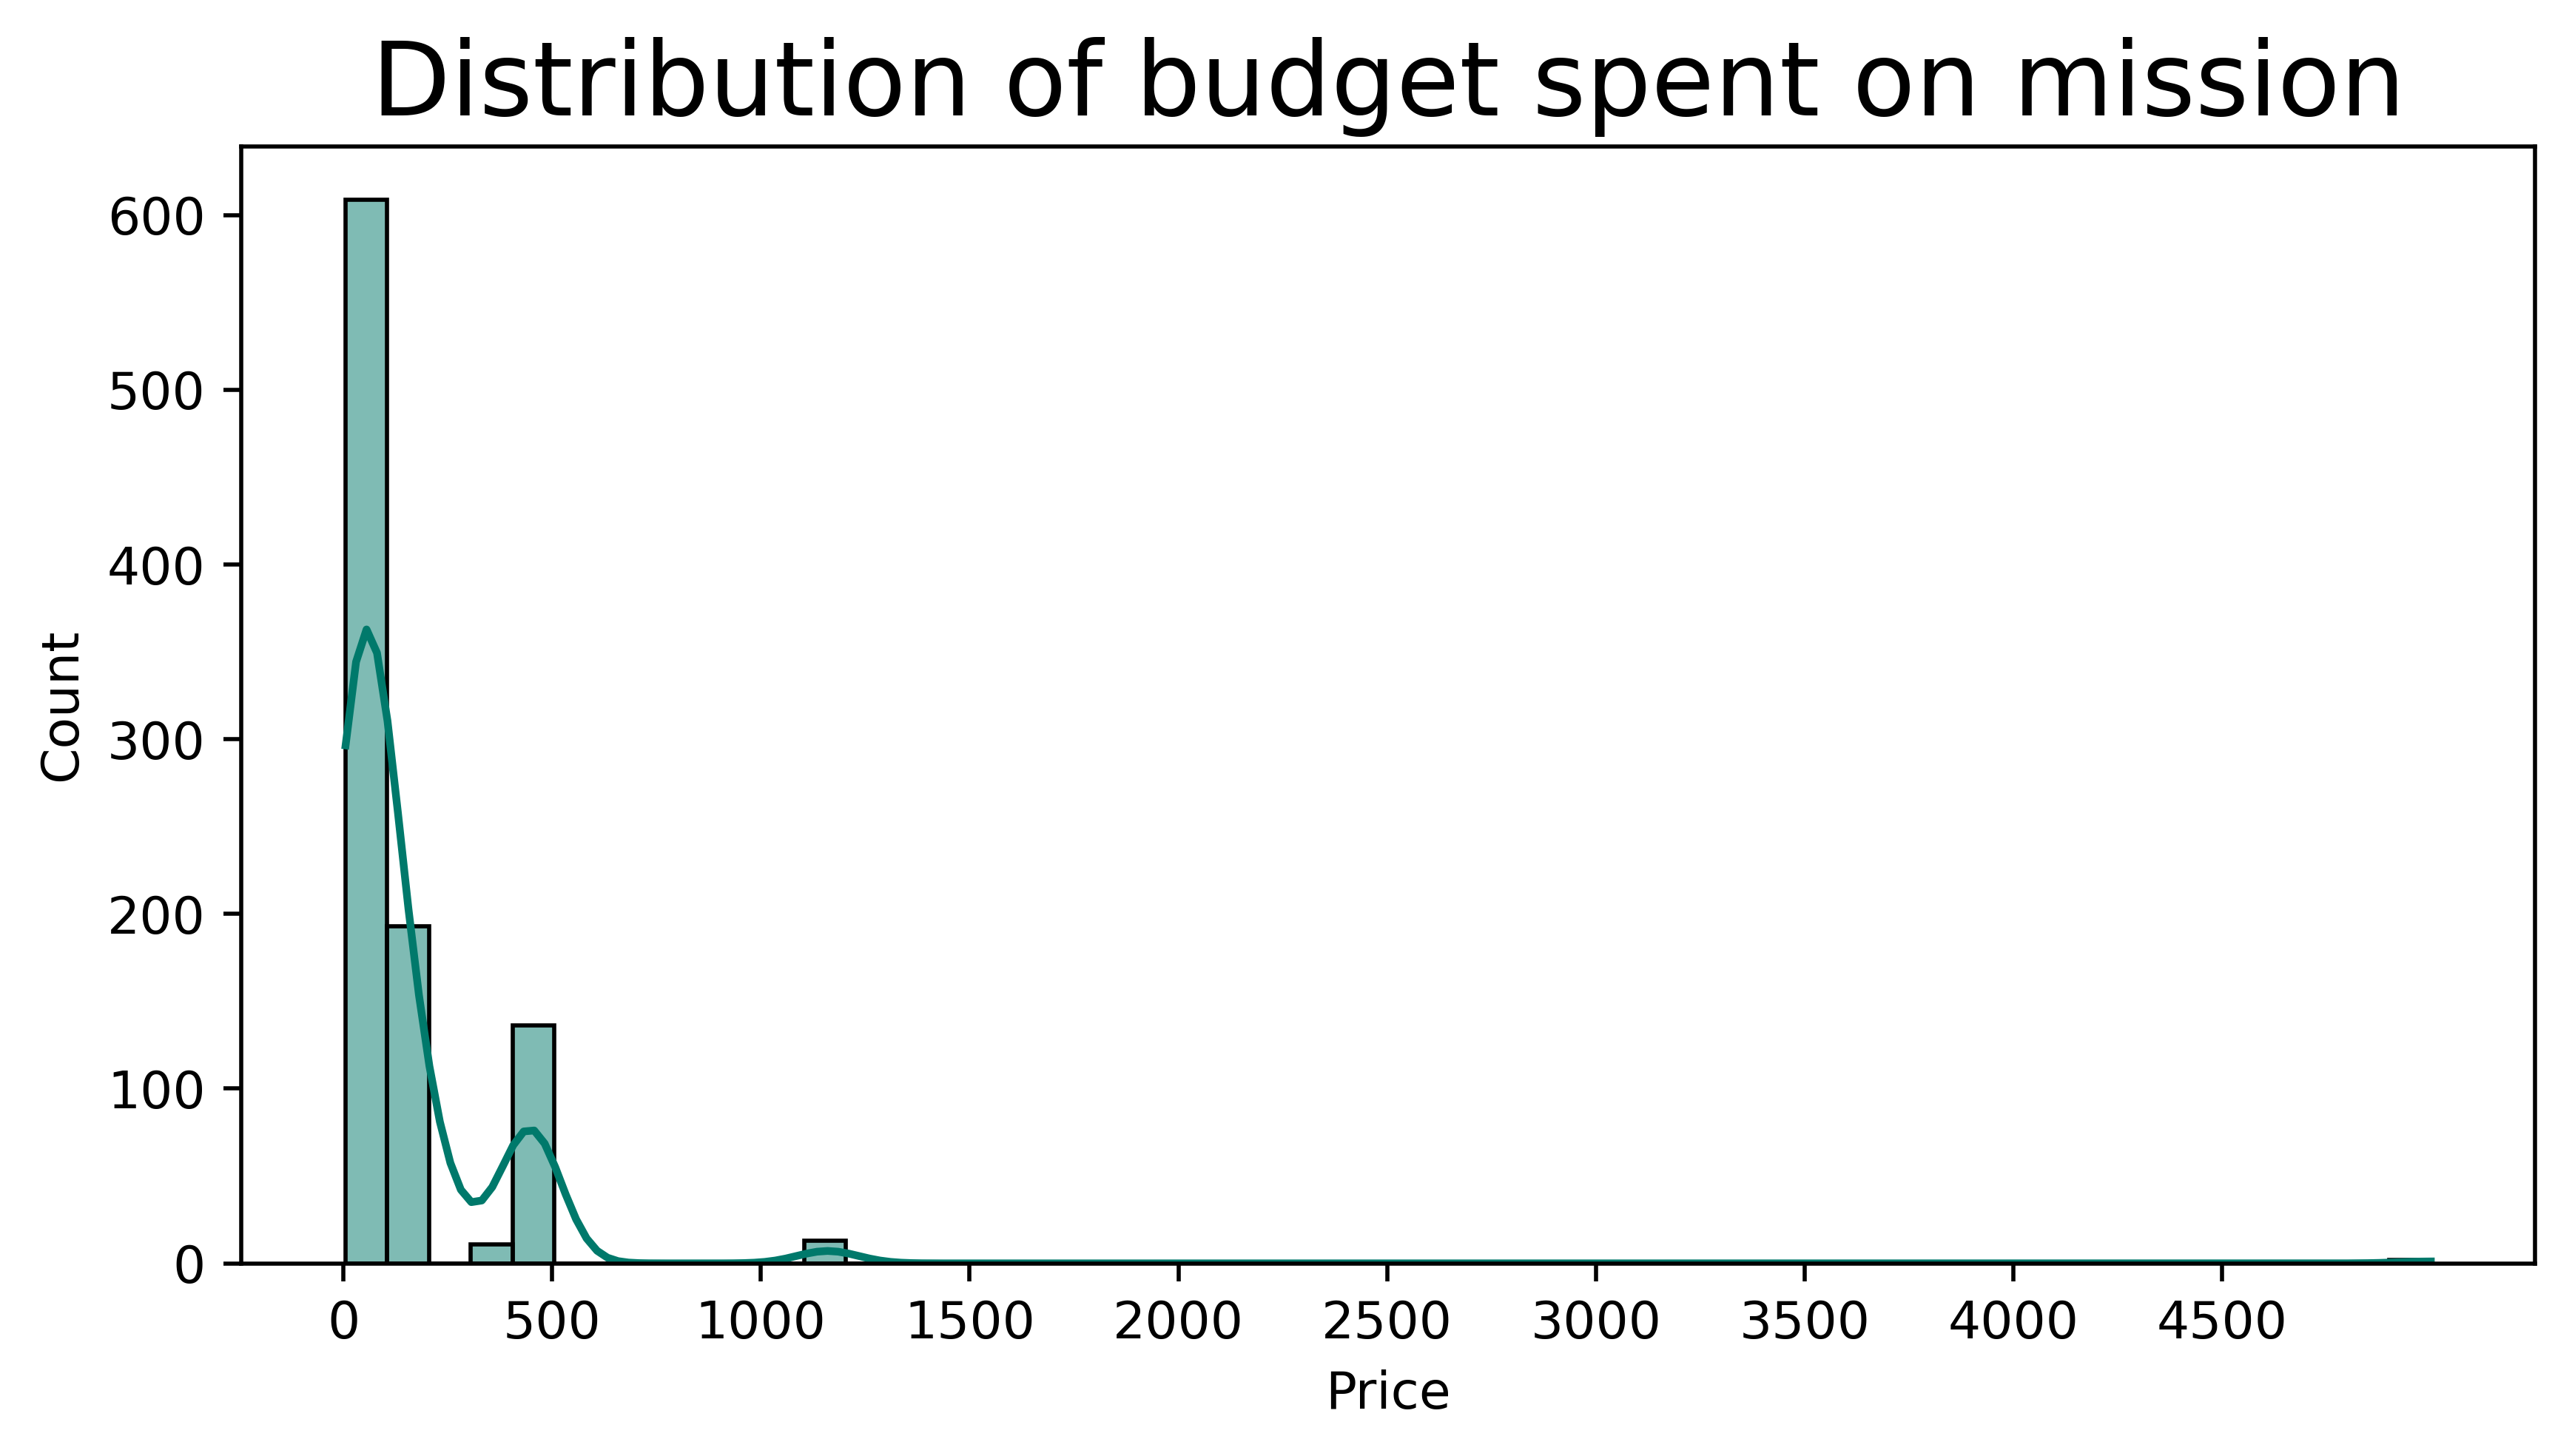

In [ ]:
plt.figure(figsize=(8,4),
        dpi=500)
plt.title("Distribution of budget spent on mission",
          fontsize=20)

ax = sns.histplot(data_dropna.Price,
              bins=50,
              kde=True,
              color='#00796b')
ax.set_xticks(np.arange(0, data_dropna.Price.max(), 500))
plt.show()

The diagram shows that most of all missions spend less than 5000 million USD 

# Use a Plotly bar to Show the Number of Launches by Country

* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA
* PacificOcean is Kiribati
* Kazakhstan is Russian Federation


In [12]:
split = df_data["Location"].str.split(",", expand = True)
split[3].fillna(split[2], inplace=True)
df_data["Country"]=split[3]


In [13]:
df_data["Country"] = df_data["Country"].str.replace("Russia", "Russian Federation")
df_data["Country"] = df_data["Country"].str.replace("New Mexico", "USA")
df_data["Country"] = df_data["Country"].str.replace("Barents Sea", "Russian Federation")
df_data["Country"] = df_data["Country"].str.replace("Gran Canaria", "USA")
df_data["Country"] = df_data["Country"].str.replace("Pacific Missile Range Facility", "USA")
df_data["Country"] = df_data["Country"].str.replace("PacificOcean", "Kiribati")
df_data["Country"] = df_data["Country"].str.replace("Kazakhstan", "Russian Federation")
df_data["Country"] = df_data["Country"].str.replace(" ", "")

# Use a Plotly to Show the Number of Failures by Country


In [14]:
failure = df_data[df_data.Mission_Status != "Success"]

In [15]:
mission_failure = failure.groupby("Country").agg({"Mission_Status": pd.Series.count})
mission_failure.sort_values("Mission_Status", ascending=False, inplace=True)

In [16]:
status_bar = px.bar(data_frame=mission_failure,
                    y="Mission_Status",
                    color="Mission_Status",
                    color_continuous_scale="redor",
                    title="Mission failure by countries")
status_bar.update_layout(xaxis_title="Countries",
                         yaxis_title="Number of mission failure")
status_bar.show()

The two competitors, Russian Federation and USA, is far outstanding comparing to any other countries. This may indicate that USA did slightly better than Russian Federation but we cannot conclude using this diagram only since this data is not normalized.

In [ ]:
mission_by_country = df_data.groupby("Country").agg({"Mission_Status": pd.Series.count})

In [ ]:
failure_rate = mission_failure/mission_by_country
failure_rate.sort_values("Mission_Status", ascending=False, inplace=True)

In [ ]:
fail_rate_bar = px.bar(data_frame=failure_rate,
                    y="Mission_Status",
                    color="Mission_Status",
                    color_continuous_scale="redor",
                    title="Mission failure rate by countries")
fail_rate_bar.update_layout(xaxis_title="Countries",
                         yaxis_title="Failure rate")
fail_rate_bar.show()

It is clear that Brazil has not had any success case of rocket launching with failure rate of 100%. Talking about our two rivals, after data normalizing, turns out Russian Federation has done better by around 3.2%. Another interesting point is that more than half of space mission of both North and South Korea has failed, even with extreme different in politics and access to global technology. Geographic factor might be one of the drag which lead to failure.

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [17]:
sunburst_data = df_data.groupby(["Country", "Organisation"], as_index=False).agg({"Mission_Status": pd.Series.count})
sunburst_data.sort_values("Mission_Status", ascending=False, inplace=True)

In [18]:
sunburst = px.sunburst(sunburst_data,
                       path=["Country", "Organisation", "Mission_Status"],
                       values="Mission_Status",
                       title="Number of mission by organisation and country")
sunburst.show()

Russian Federation contribute almost half of the mission in this dataset. This show a considerable interest in space exploration.

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
budget_organisation = df_data.groupby("Organisation").agg({"Price": pd.Series.sum})
budget_organisation.sort_values("Price", ascending=False, inplace=True)

In [ ]:
budget_bar = px.bar(data_frame=budget_organisation[:10],
                    y="Price",
                    color="Price",
                    color_continuous_scale="teal",
                    title="Top 10 organisations with highest budget on space mission")
budget_bar.update_layout(xaxis_title="Organisations",
                         yaxis_title="Budget (Million USD)")
budget_bar.show()

NASA is outstanding when it comes to money spent on space exploration. It is interesting that half of these organisations are loacated in USA. Arianespace is the second most spent organisation is a little surprise because the launching site contribute in the fouth rank when consider number of total mission. This might indicate that France spent money per launch more than any other countries

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
number_of_launch = df_data["Organisation"].value_counts(ascending=False)


In [ ]:
price_per_launch = budget_organisation["Price"] / number_of_launch
price_per_launch.sort_values(ascending=False, inplace=True)

In [ ]:
budget_per_launch_bar = px.bar(price_per_launch[:10],
                               color=price_per_launch[:10].values,
                               color_continuous_scale="curl",
                               title="Top 10 organisations with highest budget per launch")
budget_per_launch_bar.update_layout(xaxis_title="Organisations",
                                    yaxis_title="Budget (Million USD) per launch")
budget_per_launch_bar.show()

# Chart the Number of Launches per Year

In [19]:
df_data["Year"] = pd.DatetimeIndex(df_data["Date"]).year

In [33]:
year = df_data.groupby(["Year"], as_index=False)["Detail"].agg("count")

In [53]:
year_line = px.line(data_frame=year,
                    x="Year",
                    y="Detail",
                    title="Number of launch by time")
year_line.update_layout(xaxis_title="Year",
                        yaxis_title="Number of launch")
year_line.show()

From the chart, space mission started off in spike rate. The number of launch reached its peak on 1971 then followed by abrubt decline after 1977. The space mission has recovered again after 2015. This fluctuation worth a shot of looking by each contries.

In [36]:
year_countries = df_data.groupby(["Year", "Country"], as_index=False)["Detail"].agg("count")

In [52]:
year_countries_line = px.line(data_frame=year_countries,
                              x="Year",
                              y="Detail",
                              color="Country",
                              title="Number of launch each countries")
year_countries_line.update_layout(xaxis_title="Year",
                                  yaxis_title="Number of launch")
year_countries_line.show()

Two cold war competitors, USA and Russian Federation, have started off in very high rate. Then, somehow, Russian Federation decreased its program considerably after 1977. The country is the main reason of huge decline in previous graph. Another interesting point that needed to be point out is that even though only two nations has space program capability in the beginning, a lot of countries are contributed in present day. This is obvious that after 2010, at least 4 countries are active in space mission.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [40]:
price = df_data.groupby("Year").agg({"Price": pd.Series.sum})

In [51]:
price_line = px.line(data_frame=price,
                   x=price.index,
                   y="Price",
                   title="Money spent over time")
price_line.update_layout(xaxis_title="Year",
                       yaxis_title="Miilion USD")
price_line.show()

Even with some degree of fluctuation, we can notice that the budget of space mission has upward trend over time. However, there is some unrealistic aspect this data show. For some year, eg. 1957-1963 and 1974-1980, the amount of money spent is zero. We knew since the beginning that there is some missing data in "Price" column which indicate in this diagram.

In [48]:
na = df_data["Price"].isna().groupby(df_data["Year"]).sum().astype(int).reset_index(name="Count")

In [50]:
na_bar = px.bar(data_frame=na,
                   x=na.index,
                   y="Count",
                   title="Missing price data over time")
na_bar.update_layout(xaxis_title="Year",
                       yaxis_title="Count")
na_bar.show()

As it can be seen, there is a lot of missing data. So, the "Money spent over time" diagram might not be reliable. These missing point might be a classified project that did not annouce budget publicly.

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [62]:
year_organisations = df_data.groupby(["Year", "Organisation"], as_index=False).agg({"Detail": pd.Series.count})
year_organisations.rename(columns={"Detail": "Num_launch"}, inplace=True)
year_organisations

,Year,Organisation,Num_launch
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [63]:
year_organisations_line = px.line(data_frame=year_organisations,
                                  x="Year",
                                  y="Num_launch",
                                  color="Organisation",
                                  title="Number of launch each organisations")
year_organisations_line.update_layout(xaxis_title="Year",
                                      yaxis_title="Number of launch")
year_organisations_line.show()

RVSN USSR of Russian Federation was outstanding until 1992. This show their science power in the cold war era.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [67]:
cold_war = df_data[(df_data["Year"] <= 1991) & 
                   ((df_data["Country"] == "RussianFederation") | (df_data["Country"] == "USA"))]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [73]:
two_countries = cold_war["Country"].value_counts()
two_countries

RussianFederation    1770
USA                   662
Name: Country, dtype: int64

In [107]:
pie = px.pie(names=two_countries.index,
             values=two_countries.values,
             color=two_countries.index,
             color_discrete_map={"USA": "cornflowerblue",
                                "RussianFederation": "tomato"},
             title="Number of space mission during cold war of USA and USSR")
pie.update_traces(textinfo="value+percent")
pie.show()

It is clear that USSR had much more active space activity. Interestingly, even though USA was out-numbered considering number of mission, the country was the first to succeed "Man to the moon" mission

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [87]:
total_launch = cold_war.groupby(["Year", "Country"], as_index=False).agg({"Detail": pd.Series.count})
total_launch.rename(columns={"Detail": "Num_launch"}, inplace=True)

In [108]:
year_two_countries = px.line(data_frame=total_launch,
                                  x="Year",
                                  y="Num_launch",
                                  color="Country",
                                  color_discrete_map={"USA": "cornflowerblue",
                                                      "RussianFederation": "tomato"},
                                  title="Number of launch of both countries")
year_two_countries.update_layout(xaxis_title="Year",
                                      yaxis_title="Number of launch")
year_two_countries.show()

Before 1963, USA had much more space program then followed by gradual declined trend. USSR, on the other hand, increased its space mission exponentially until 1977.

## Chart the Total Number of Mission Failures Year on Year.

In [127]:
fail = cold_war[cold_war["Mission_Status"] != "Success"]
fail = fail.groupby(["Year", "Country"], as_index=False).agg({"Detail": pd.Series.count})
fail.rename(columns={"Detail": "Num_fail"}, inplace=True)

In [128]:
fail.loc[-1] = ["1957", "RussianFederation", 0] #Add fail=0 of Russian Federation on 1957
fail.index = fail.index + 1
fail = fail.sort_index()

In [132]:
year_fail = px.line(data_frame=fail,
                    x="Year",
                    y="Num_fail",
                    color="Country",
                    color_discrete_map={"USA": "cornflowerblue",
                                        "RussianFederation": "tomato"},
                    title="Number of failure of both countries")
year_fail.update_layout(xaxis_title="Year",
                        yaxis_title="Number of failure")
year_fail.show()

Fail mission graph seems to follow the same trend as total number of launch. USA has more failure at the beginning then Russian federation took over on 1962-1963. So, which country did a better job? To answer that, the data need to be normalized.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
fail["fail_rate"] = fail["Num_fail"] / total_launch["Num_launch"]

In [133]:
year_fail_rate = px.line(data_frame=fail,
                          x="Year",
                          y="fail_rate",
                          color="Country",
                          color_discrete_map={"USA": "cornflowerblue",
                                              "RussianFederation": "tomato"},
                          title="Failure rate of both countries")
year_fail_rate.update_layout(xaxis_title="Year",
                             yaxis_title="Failure rate")
year_fail_rate.show()

Apparently, USA has learnt from their mistake. Failure rate of USA decreased constantly over time from 100% failure rate on 1957. USSR had a similar trend until after 1969 which has a noticable spike in fail mission.